# Učitavanje i analiza dataset-a

Učitavanje potrebnih biblioteka, spajanje na drive i učitavanje dataseta

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install anvil-uplink
!pip install tensorflow
!pip install -q keras-tuner
!pip install scikit-learn pandas nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.5/124.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.3 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
file_path='/content/drive/MyDrive/VI Projekat - Klasifikacija novinskih članaka/news-article-categories.csv'
data=pd.read_csv(file_path)

Osnovni pregled

In [ ]:
broj_instanci=len(data)
print("Broj instanci u datasetu: ",broj_instanci)

atributi=data.columns.tolist()
print("Atributi u datasetu su: ")
for atribut in atributi:
  print(f"- {atribut}")

klase=data['category'].unique()
broj_klasa=data['category'].nunique()
print(f"Dataset ima {broj_klasa} klasa.")
print("Klase u datasetu: ")
for klasa in klase:
  print(f"- {klasa}")

Broj instanci u datasetu:  6877
Atributi u datasetu su: 
- category
- title
- body
Dataset ima 14 klasa.
Klase u datasetu: 
- ARTS & CULTURE
- BUSINESS
- COMEDY
- CRIME
- EDUCATION
- ENTERTAINMENT
- ENVIRONMENT
- MEDIA
- POLITICS
- RELIGION
- SCIENCE
- SPORTS
- TECH
- WOMEN


In [ ]:
broj_instanci = data['category'].value_counts()
procenat_instanci = data['category'].value_counts(normalize=True) * 100

prikaz_klasa = pd.DataFrame({
    'Broj instanci': broj_instanci,
    'Procenat (%)': procenat_instanci
})

prikaz_klasa['Procenat (%)'] = prikaz_klasa['Procenat (%)'].round(2)

print("Raspodela instanci po klasama (broj i procenat):")
print(prikaz_klasa)

Raspodela instanci po klasama (broj i procenat):
                Broj instanci  Procenat (%)
category                                   
ARTS & CULTURE           1002         14.57
BUSINESS                  501          7.29
ENTERTAINMENT             501          7.29
RELIGION                  501          7.29
POLITICS                  501          7.29
ENVIRONMENT               501          7.29
WOMEN                     501          7.29
TECH                      501          7.29
SPORTS                    501          7.29
EDUCATION                 490          7.13
COMEDY                    380          5.53
SCIENCE                   350          5.09
MEDIA                     347          5.05
CRIME                     300          4.36


Bar chart grafik

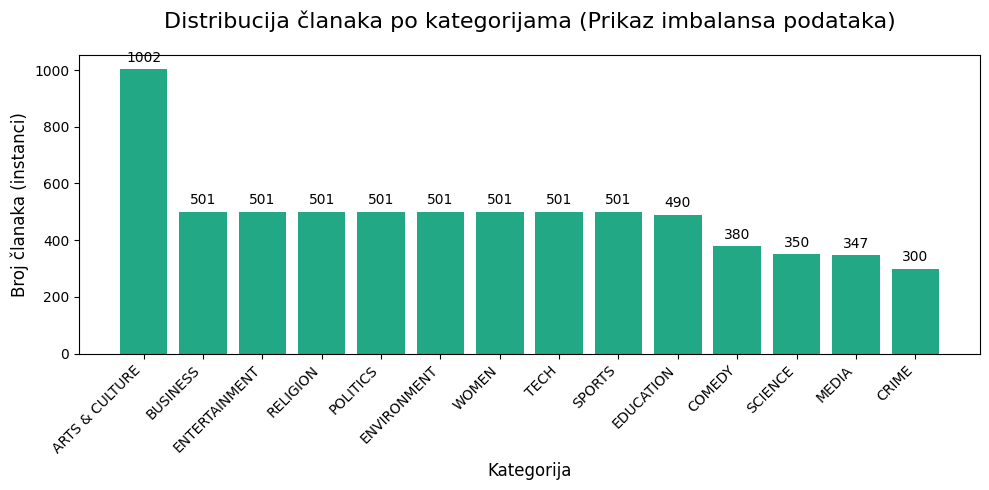

In [ ]:
instance_po_klasi = data['category'].value_counts()

plt.figure(figsize=(10, 5))
bars = plt.bar(instance_po_klasi.index, instance_po_klasi.values, color=plt.cm.viridis(0.6))

plt.title('Distribucija članaka po kategorijama (Prikaz imbalansa podataka)', fontsize=16, pad=20)
plt.xlabel('Kategorija', fontsize=12)
plt.ylabel('Broj članaka (instanci)', fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 15, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Najčešće riječi u klasama

In [ ]:
from collections import Counter
import re

data['full_text'] = data['title'].astype(str) + " " + data['body'].astype(str)

def get_top_raw_words(category_name, df, top_n=10):
    category_text = " ".join(df[df['category'] == category_name]['full_text'])
    words = re.findall(r'\b\w+\b', category_text.lower())

    word_counts = Counter(words)
    return [word for word, count in word_counts.most_common(top_n)]


all_categories = data['category'].unique()
keyword_data = {}

for category in all_categories:
    keyword_data[category] = get_top_raw_words(category, data, top_n=10)

keywords_df = pd.DataFrame(keyword_data)

print("\n--- Top 10 najčešćih riječi po SVIM kategorijama (iz sirovog teksta) ---")
display(keywords_df)


--- Top 10 najčešćih riječi po SVIM kategorijama (iz sirovog teksta) ---


,ARTS & CULTURE,BUSINESS,COMEDY,CRIME,EDUCATION,ENTERTAINMENT,ENVIRONMENT,MEDIA,POLITICS,RELIGION,SCIENCE,SPORTS,TECH,WOMEN
0,the,the,the,the,the,the,the,the,the,the,the,the,the,the
1,of,to,a,a,to,to,to,to,to,of,of,to,to,to
2,and,and,to,to,and,a,and,and,of,to,to,and,a,and
3,a,a,of,and,of,and,of,a,a,and,a,a,and,of
4,to,of,s,of,a,of,a,of,and,a,and,of,of,a
5,in,in,and,in,in,in,in,that,in,in,in,in,in,in
6,s,that,in,s,that,s,that,in,s,that,that,s,s,that
7,that,s,on,that,for,i,s,s,that,is,s,that,that,i
8,is,for,that,was,is,that,for,i,for,i,is,for,it,s
9,i,is,i,on,s,it,is,on,on,s,it,on,for,it


# Pretprocesiranje

1. Spajanje dva polja u jedno

In [ ]:
data['full_text']=data['title'].fillna('')+' '+data['body'].fillna('')
data.drop(['title', 'body'], axis=1, inplace=True)

In [ ]:
print(data)

            category                                          full_text
0     ARTS & CULTURE  Modeling Agencies Enabled Sexual Predators For...
1     ARTS & CULTURE  Actor Jeff Hiller Talks “Bright Colors And Bol...
2     ARTS & CULTURE  New Yorker Cover Puts Trump 'In The Hole' Afte...
3     ARTS & CULTURE  Man Surprises Girlfriend By Drawing Them In Di...
4     ARTS & CULTURE  This Artist Gives Renaissance-Style Sculptures...
...              ...                                                ...
6872           WOMEN  Casually Fearless: Why Millennials Are Natural...
6873           WOMEN  Happy Birthday To Us I remember the morning of...
6874           WOMEN  The Culture of Love My husband, Gene, doesn't ...
6875           WOMEN  Carpe Diem, Oprah Style \nBy AntonioGuillem, v...
6876           WOMEN  My Month of Online Dating Detox My name is Jam...

[6877 rows x 2 columns]


2. Čišćenje i normalizacija

lowercasing

In [ ]:
data['full_text'] = data['full_text'].str.lower()
print(data['full_text'])

0       modeling agencies enabled sexual predators for...
1       actor jeff hiller talks “bright colors and bol...
2       new yorker cover puts trump 'in the hole' afte...
3       man surprises girlfriend by drawing them in di...
4       this artist gives renaissance-style sculptures...
                              ...                        
6872    casually fearless: why millennials are natural...
6873    happy birthday to us i remember the morning of...
6874    the culture of love my husband, gene, doesn't ...
6875    carpe diem, oprah style \nby antonioguillem, v...
6876    my month of online dating detox my name is jam...
Name: full_text, Length: 6877, dtype: object


uklanjanje specijalnih i interpunkcijskih znakova, brojeva

In [ ]:
# Uklanjanje URL-ova
url_pattern = re.compile(r'https?://\S+|www\.\S+|\S+\.(com|org|net|gov|edu|info|biz|io|co|me|ba|rs|hr)(\/\S*)?')
data['full_text'] = data['full_text'].apply(lambda x: url_pattern.sub(r'', x))

# Uklanjanje email adresa
email_pattern = re.compile(r'\S*@\S*\s?')
data['full_text'] = data['full_text'].apply(lambda x: email_pattern.sub(r'', x))

# Uklanjanje specijalnih znakova, interpunkcije i brojeva
#data['full_text'] = data['full_text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))
data['full_text'] = data['full_text'].apply(lambda x: re.sub(r"[^a-z\s']", '', x))

# Uklanjanje višestrukih razmaka i stripovanje
data['full_text'] = data['full_text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

uklanjanje stop-riječi

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("Preuzimanje NLTK 'stopwords' korpusa...")
    nltk.download('stopwords')
    print("'stopwords' korpus preuzet.")

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("Preuzimanje NLTK 'punkt' tokenizer korpusa...")
    nltk.download('punkt')
    print("'punkt' tokenizer korpus preuzet.")

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    print("Preuzimanje NLTK 'punkt_tab' tokenizer korpusa...")
    nltk.download('punkt_tab')
    print("'punkt_tab' tokenizer korpus preuzet.")

Preuzimanje NLTK 'stopwords' korpusa...
'stopwords' korpus preuzet.
Preuzimanje NLTK 'punkt' tokenizer korpusa...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


'punkt' tokenizer korpus preuzet.
Preuzimanje NLTK 'punkt_tab' tokenizer korpusa...


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


'punkt_tab' tokenizer korpus preuzet.


In [ ]:
stop_words_en = set(stopwords.words('english'))

custom_stopwords = {
   'said', 'would', 'one', 'like', 'new', 'us', 'time', 'also', 'show', 'many', 'think','first', 'last', 'told','may','even','get'}
stop_words_en.update(custom_stopwords)

def remove_stopwords(text):
    if not isinstance(text, str):
        return text
    #razbijanje na pojedinačne riječi
    words = word_tokenize(text)

    # Filtriranje stop riječi
    filtered_words = [word for word in words if word not in stop_words_en and word.isalpha()]
    # Spajanje filtriranih riječi nazad u jedan string
    return ' '.join(filtered_words)

data['full_text'] = data['full_text'].apply(remove_stopwords)

Lematizacija

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')
try:
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    nltk.download('omw-1.4')
try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng')
except LookupError:
    print("Preuzimanje NLTK 'averaged_perceptron_tagger' korpusa...")
    nltk.download('averaged_perceptron_tagger_eng')
    print("'averaged_perceptron_tagger' korpus preuzet.")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Preuzimanje NLTK 'averaged_perceptron_tagger' korpusa...
'averaged_perceptron_tagger' korpus preuzet.


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [ ]:
lemmatizer = WordNetLemmatizer()

# Funkcija za dobijanje WordNet POS tagova iz NLTK POS tagova
def get_wordnet_pos(word):
    """Map NLTK POS tag to WordNet POS tag for lemmatization"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_text(text):
    if not isinstance(text, str):
        return text

    words = word_tokenize(text)
    lemmas = []
    for word in words:
        # Lematiziraj riječ koristeći njen POS tag
        lemmas.append(lemmatizer.lemmatize(word, get_wordnet_pos(word)))
    return ' '.join(lemmas)

# Primjena funkcije na 'full_text' kolonu
data['full_text'] = data['full_text'].apply(lemmatize_text)

In [ ]:
from collections import Counter
import re

def get_top_raw_words(category_name, df, top_n=10):
    category_text = " ".join(df[df['category'] == category_name]['full_text'])
    words = re.findall(r'\b\w+\b', category_text.lower())

    word_counts = Counter(words)
    return [word for word, count in word_counts.most_common(top_n)]


all_categories = data['category'].unique()
keyword_data = {}

for category in all_categories:
    keyword_data[category] = get_top_raw_words(category, data, top_n=10)

keywords_df = pd.DataFrame(keyword_data)

print("\n--- Top 10 najčešćih riječi po SVIM kategorijama nakon pretprocesiranja (iz sirovog teksta) ---")
display(keywords_df)


--- Top 10 najčešćih riječi po SVIM kategorijama nakon pretprocesiranja (iz sirovog teksta) ---


,ARTS & CULTURE,BUSINESS,COMEDY,CRIME,EDUCATION,ENTERTAINMENT,ENVIRONMENT,MEDIA,POLITICS,RELIGION,SCIENCE,SPORTS,TECH,WOMEN
0,art,company,trump,police,school,go,climate,news,trump,people,year,game,company,woman
1,work,make,president,accord,student,make,year,trump,state,god,scientist,team,facebook,sexual
2,make,people,donald,report,education,know,animal,go,president,muslim,science,player,use,make
3,artist,work,check,shoot,teacher,people,change,people,people,church,study,year,make,men
4,people,year,clip,people,child,year,make,say,year,christian,people,sport,people,go
5,year,business,host,charge,make,movie,water,know,make,make,use,go,apple,year
6,woman,take,make,school,year,film,state,make,house,american,make,athlete,year,people
7,go,say,go,victim,state,see,energy,woman,say,religious,research,make,google,take
8,book,go,colbert,year,public,dont,people,time,campaign,trump,space,olympic,user,say
9,take,uber,late,found,learn,take,world,president,law,year,could,take,go,assault


Podjela na trening, test i validacijski skup

In [ ]:
from sklearn.model_selection import train_test_split

#ulaz (X) i ciljna varijabla (y)
X=data['full_text']
y=data['category']

# 70% za trening, a 30% za privremeni skup (koji će biti validacija + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# podjela na dva jednaka dijela (15% + 15%) validacija+test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

In [ ]:
print(f"Broj instanci u trening skupu: {len(X_train)}")
print(f"Broj instanci u validacionom skupu: {len(X_val)}")
print(f"Broj instanci u testnom skupu: {len(X_test)}")

Broj instanci u trening skupu: 4813
Broj instanci u validacionom skupu: 1032
Broj instanci u testnom skupu: 1032


# Priprema formata podataka da odgovara izabranom modelu

Vektorizacija pomoću TF-IDF (BoW+Bigrams)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ngram_range=(1, 2) -> koristi i pojedinačne riječi (unigrami/BoW) i parove riječi (bigrami)
# max_features=10000 -> ograničava rječnik na 10,000 najčešćih n-grama
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)

# Učenje rječnika i transformacija SAMO na trening podacima
X_train_vec = tfidf_vectorizer.fit_transform(X_train)

# Transformacija validacionog i testnog skupa
X_val_vec = tfidf_vectorizer.transform(X_val)
X_test_vec = tfidf_vectorizer.transform(X_test)

# --- Provjera dimenzija (broj_članaka, veličina_rječnika)
print("Oblik trening vektora:", X_train_vec.shape)
print("Oblik validacionih vektora:", X_val_vec.shape)
print("Oblik testnih vektora:", X_test_vec.shape)

Oblik trening vektora: (4813, 10000)
Oblik validacionih vektora: (1032, 10000)
Oblik testnih vektora: (1032, 10000)


One-hot enkodiranje labela

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_train_int = label_encoder.fit_transform(y_train)
y_val_int = label_encoder.transform(y_val)
y_test_int = label_encoder.transform(y_test)

# Dobijanje broja klasa
num_classes = len(label_encoder.classes_)
print(f"Pronađeno je {num_classes} jedinstvenih klasa.")

# Konverzija cjelobrojnih vrednosti u one-hot format
y_train_cat = to_categorical(y_train_int, num_classes=num_classes)
y_val_cat = to_categorical(y_val_int, num_classes=num_classes)
y_test_cat = to_categorical(y_test_int, num_classes=num_classes)
print("Oblik trening labela (y_train_cat):", y_train_cat.shape)

# Primjer transformacije
print("Originalna labela:", y_train.iloc[0])
print("Nakon LabelEncoder-a:", y_train_int[0])
print("Nakon to_categorical (One-Hot):", y_train_cat[0])

Pronađeno je 14 jedinstvenih klasa.
Oblik trening labela (y_train_cat): (4813, 14)
Originalna labela: EDUCATION
Nakon LabelEncoder-a: 4
Nakon to_categorical (One-Hot): [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#Optimizacija hiperparametara i arhitektura modela

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

Funkcija za izgradnju modela (za Tuner)

In [ ]:
def build_model(hp):
    model = Sequential()

    # Ulazni sloj
    model.add(Input(shape=(VOCAB_SIZE,), name='ulazni_sloj'))

    # 1. Optimizacija broja neurona u skrivenom sloju
    hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
    model.add(Dense(units=hp_units, activation='relu', name='skriveni_sloj_1'))

    # 2. Optimizacija Dropout stope
    hp_dropout = hp.Float('dropout', min_value=0.3, max_value=0.7, step=0.1)
    model.add(Dropout(rate=hp_dropout, name='dropout_sloj'))

    # Izlazni sloj
    model.add(Dense(num_classes, activation='softmax', name='izlazni_sloj'))

    # 3. Optimizacija stope učenja (learning rate) za Adam optimizator
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

Inicijalizacija Tunera i pretraga

In [ ]:
VOCAB_SIZE = 10000
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',  # Cilj je maksimizirati tačnost na validacijskom skupu
                     max_epochs=20,             # Maksimalan broj epoha za treniranje jednog modela
                     factor=3,                  # Faktor smanjenja broja modela po rundi
                     directory='my_dir',        # Direktorij za čuvanje rezultata
                     project_name='news_classification')

# Kreiranje EarlyStopping callbacka da se pretraga ne bi odužila nepotrebno
# Prekinut će treniranje pojedinačnog modela ako se val_loss ne poboljša nakon 3 epohe
from tensorflow.keras.callbacks import EarlyStopping
stop_early = EarlyStopping(monitor='val_loss', patience=3)


# Pokretanje pretrage hiperparametara
print("--- Započinjanje pretrage hiperparametara ---")
tuner.search(X_train_vec, y_train_cat,
             epochs=20,
             validation_data=(X_val_vec, y_val_cat),
             callbacks=[stop_early],
             batch_size=32)

print("--- Pretraga je završena ---")

# Preuzimanje najboljih hiperparametara
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Pretraga je završena. Optimalni hiperparametri su:
- Broj neurona u gustom sloju: {best_hps.get('units')}
- Dropout stopa: {best_hps.get('dropout')}
- Stopa učenja (Learning Rate): {best_hps.get('learning_rate')}
""")

Trial 30 Complete [00h 01m 30s]
val_accuracy: 0.8275193572044373

Best val_accuracy So Far: 0.8323643207550049
Total elapsed time: 00h 12m 02s
--- Pretraga je završena ---

Pretraga je završena. Optimalni hiperparametri su:
- Broj neurona u gustom sloju: 32
- Dropout stopa: 0.5
- Stopa učenja (Learning Rate): 0.01



Kreiranje i treniranje modela sa najboljim hiperparametrima

In [ ]:
final_model = tuner.hypermodel.build(best_hps)

print("\n--- Započinjanje treniranja finalnog modela ---")
history_final = final_model.fit(X_train_vec, y_train_cat,
                                epochs=30,
                                validation_data=(X_val_vec, y_val_cat),
                                callbacks=[stop_early],
                                batch_size=32)

print("\n--- Trening finalnog modela je završen ---")


--- Započinjanje treniranja finalnog modela ---
Epoch 1/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3558 - loss: 2.0559 - val_accuracy: 0.7859 - val_loss: 0.8024
Epoch 2/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7752 - loss: 0.7668 - val_accuracy: 0.8101 - val_loss: 0.6633
Epoch 3/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8631 - loss: 0.4764 - val_accuracy: 0.8033 - val_loss: 0.6611
Epoch 4/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8753 - loss: 0.3687 - val_accuracy: 0.8081 - val_loss: 0.6828
Epoch 5/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9141 - loss: 0.2603 - val_accuracy: 0.8023 - val_loss: 0.7235
Epoch 6/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9253 - loss: 0.2086 - val_accuracy: 0.8014 - val_loss: 0.7652

--- Trening finalnog modela je završen ---


Evaluacija modela

In [ ]:
# Evaluacija na testnom skupu ostaje ista, samo koristiš 'final_model'
loss, accuracy = final_model.evaluate(X_test_vec, y_test_cat)
print(f"\nTačnost na testnom skupu: {accuracy:.4f}")

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

predictions = final_model.predict(X_test_vec)
y_pred = np.argmax(predictions, axis=1)
y_test_true = np.argmax(y_test_cat, axis=1)
class_names = label_encoder.classes_

print("\n--- Izveštaj o Klasifikaciji na Testnom Skupu (Finalni Model) ---")
print(classification_report(y_test_true, y_pred, target_names=class_names))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8148 - loss: 0.7349

Tačnost na testnom skupu: 0.7936
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

--- Izveštaj o Klasifikaciji na Testnom Skupu (Finalni Model) ---
                precision    recall  f1-score   support

ARTS & CULTURE       0.86      0.92      0.89       150
      BUSINESS       0.62      0.69      0.65        75
        COMEDY       0.86      0.67      0.75        57
         CRIME       0.82      0.82      0.82        45
     EDUCATION       0.82      0.77      0.79        73
 ENTERTAINMENT       0.70      0.83      0.76        75
   ENVIRONMENT       0.83      0.83      0.83        75
         MEDIA       0.71      0.67      0.69        52
      POLITICS       0.76      0.82      0.78        76
      RELIGION       0.93      0.86      0.89        76
       SCIENCE       0.87      0.89      0.88        53
        SPORTS       0.92      0.81      0.87        75
          TECH       0.80      0.76      0.78        75
  

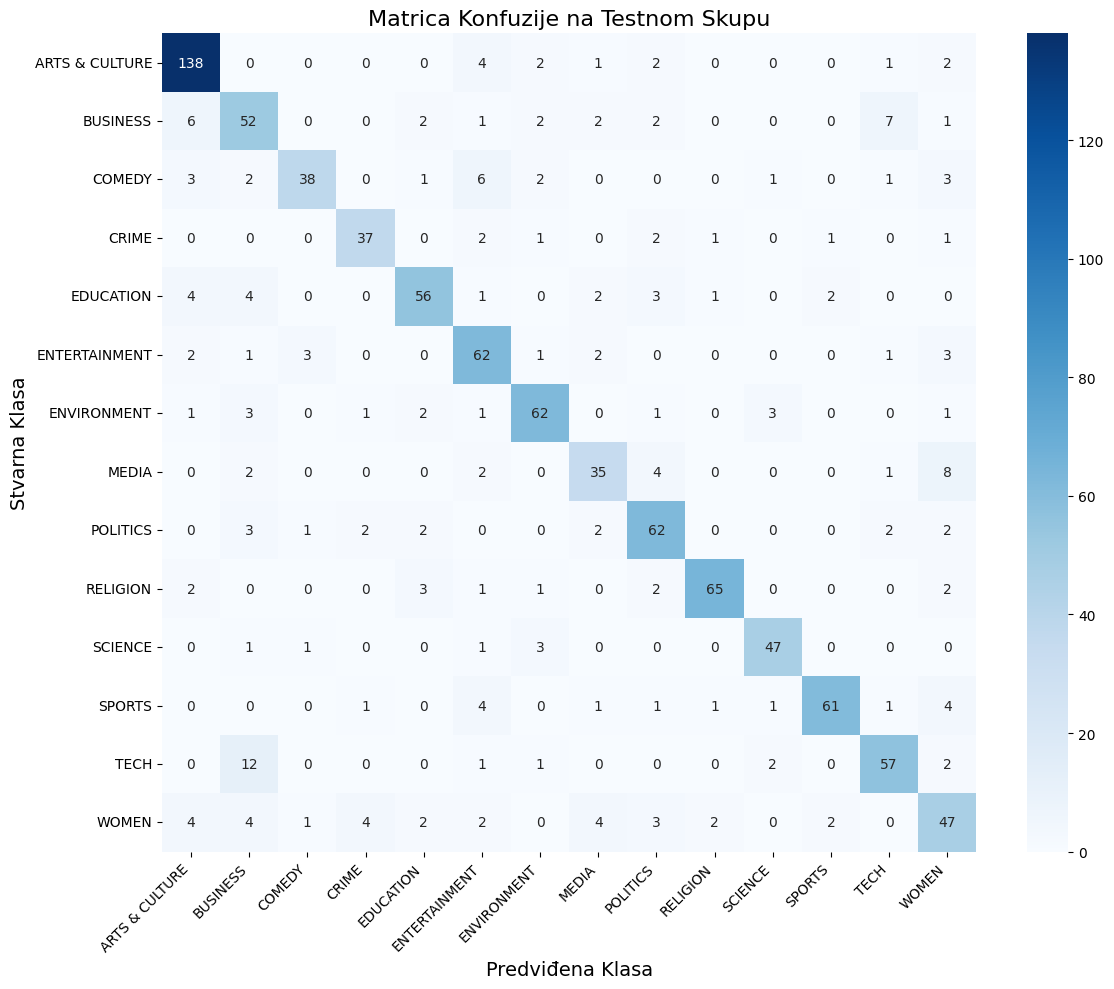

In [ ]:
# Kreiranje matrice konfuzije
cm = confusion_matrix(y_test_true, y_pred)

# Vizuelizacija matrice konfuzije pomoću heatmap-a za bolju preglednost
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Matrica Konfuzije na Testnom Skupu', fontsize=16)
plt.ylabel('Stvarna Klasa', fontsize=14)
plt.xlabel('Predviđena Klasa', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() # Osigurava da se labele ne preklapaju
plt.show()

# Testiranje modela na nepoznatim podacima

Definisanje novih članaka

In [ ]:
novi_clanci = [
    # Link: https://www.bbc.com/news/articles/cpwq2vnd827o
    """'Paralysed and constantly caught by surprise': Voices from Iran after US strikes. My days and nights are the same. I feel paralysed. I just stare at the ceiling all day and all night. I keep wondering what will happen next, and we are constantly caught by surprise. Shahla - whose name we have changed for her protection - is among the Iranians who have contacted BBC Persian to express their fear and anger after the US bombed three of their country's key nuclear sites overnight. US President Donald Trump said the Isfahan, Natanz and Fordo facilities were "obliterated" and told Iran's leaders that they now had a choice of "peace or tragedy". But Iranian Foreign Minister Abbas Araghchi said the US had crossed "a big red line" and warned that it would have "everlasting consequences". The strikes happened just over a week after Israel launched a large-scale air campaign against Iran, saying it aimed to remove what it called the existential threats of the country's nuclear and ballistic missile programmes. Iran's health ministry says at least 430 people have been killed so far, although one human rights group has put the death toll at double that. Iran has responded by launching missiles at Israeli cities, killing 24 people, according to Israeli authorities. Iran's government has severely restricted access to the internet over the past week, limiting the flow of information about what is happening on the ground and making it harder for families to communicate. Mehri - also not her real name – was nevertheless able to send BBC Persian an audio message saying how the US strikes had left her upset and angry. "I don't think I've ever felt this level of sorrow and rage over anything in my life," she said. "But in a way, it also gives me a strange sense of clarity - it reminds me that I'm connected to something beyond myself." "This war - Iran's war - is essentially a conflict between three individuals. Three leaders, from three countries, driven by their own ideologies," she added, apparently referring to Trump, Israeli Prime Minister Benjamin Netanyahu and Iran's Supreme Leader Ayatollah Ali Khamenei.""",

    # Link: https://www.bbc.com/news/articles/cgrx0e98peeo
    """'Hundreds of Voice of America reporters fired as Trump guts outlet' Hundreds of journalists for Voice of America (VOA) - most of its remaining staff - have been fired by President Donald Trump's administration, effectively shutting down the US-funded news outlet. The administration said the layoffs were because the agency was "riddled with dysfunction, bias and waste". Steve Herman, VOA's chief national correspondent, called the dismantling of the outlet, which was set up during World War Two to counter Nazi propaganda, a "historic act of self-sabotage". Among those axed were Persian-language reporters who had been on administrative leave, but were called back to work last week after Israel attacked Iran. According to the Associated Press news agency, the Persian reporters had left the office on Friday for a cigarette break, and were not allowed to re-enter the building after the termination notices went out. "Today, we took decisive action to effectuate President Trump's agenda to shrink the out-of-control federal bureaucracy," Kari Lake, whom the president appointed to run VOA, said in a statement on Friday announcing the layoffs of 639 employees. In total, more than 85% of the agency's employees - about 1,400 staff - have lost their jobs since March. She noted that 50 employees would remain employed across VOA, the Office of Cuba Broadcasting, and VOA's parent company, the US Agency for Global Media (USAGM). A statement issued by three VOA journalists who have been suing to stop the elimination of the network said about the latest firings: "It spells the death of 83 years of independent journalism that upholds US ideals of democracy and freedom around the world." The move had been expected since March when Trump ordered VOA, as well as USAGM, which oversees VOA and funds outlets such as Radio Free Europe and Radio Free Asia, to be "eliminated to the maximum extent consistent with applicable law". The agencies have won acclaim and international recognition for their reporting in places where press freedom is severely curtailed or non-existent, from China and Cambodia to Russia and North Korea. But Dan Robinson, a former VOA news correspondent, wrote in an op-ed last year that the outlet had become a "hubris-filled rogue operation often reflecting a leftist bias aligned with partisan national media".""",

    # Link: https://edition.cnn.com/2025/06/20/science/bogong-moth-star-navigation
    """Scientists say a tiny brown moth navigates 600 miles using stars — just like humans and birds. Each year, a tiny species in Australia makes a grueling 620-mile (1,000-kilometer) nighttime migration, and it’s pulling off the feat in a way only humans and migratory birds have been known to do, a new study has found. Bogong moths looking to escape the heat travel in the spring from all over southeastern Australia to cool caves in the Australian Alps, where they huddle in a dormant state. The insects then fly all the way back in the fall to mate and die. Researchers replicated the conditions of this astonishing journey in the lab and discovered a key tool the moths used to find their way: the starry night sky. “It is an act of true navigation,” said Eric Warrant, head of the Division of Sensory Biology at Lund University in Sweden, and a coauthor of the study published Wednesday in the journal Nature. “They’re able to use the stars as a compass to find a specific geographic direction to navigate, and this is a first for invertebrates.” Stars are not the only navigational cue the insects use to reach their destination. They can also detect Earth’s magnetic field, according to evidence found by previous research conducted by Warrant and some of his colleagues from the new study. By using two cues, the moths have a backup in case either system fails — for example, if there is a magnetic anomaly or the night sky is cloudy. “With a very small brain, a very small nervous system, (the moths) are able to harness two relatively complex cues and not only detect them, but also use them to work out where to go,” Warrant added.""",

    # Link: https://edition.cnn.com/2025/06/20/entertainment/benson-boone-mr-electric-blue-music-video
    """'Benson Boone, still rocking that skintight jumpsuit, drops new ‘Mr. Electric Blue’ music video' After making quite the splash at the Grammys where he backflipped in a body-hugging, baby blue sequined jumpsuit, Benson Boone is back with new music and a very tongue-in-cheek music video. The singer and former “American Idol” contestant released his second studio album “American Heart” on Friday, paired with the record’s fourth single “Mr. Electric Blue,” with an accompanying music video that sees him in various getups that are more than a little self-deprecating. The clip opens with Boone, wearing a t-shirt emblazoned with the phrase “One Hit Wonder,” being called into the office of a smarmy agent – identified by a deskplate as “Benson Boone Agent” and played by Jack LaFrantz, Boone’s sometime songwriting partner. The agent breaks the news to the 22-year-old crooner that “we put all our money in moonbeam ice cream and the backflip, and it’s done absolutely horrible,” a reference to one of Boone’s earlier singles on the record, “Mystical Magical.” “We need something new. We need a new gimmick!” the agent exclaims. “Maybe, good songwriting?” “You know I can’t do that,” Boone replies. He is then informed by the agent that he “owes” the label $10 million and spends the rest of the music video doing odd jobs to raise funds.""",

    # Link: https://www.cbsnews.com/news/bride-killed-child-wounded-wedding-party-goult-france/
    """'Bride shot dead, 13-year-old wounded by masked gunmen at wedding party in France' Armed men opened fire at a wedding party in southeastern France early Sunday, killing the bride and wounding three others, said a source close to the investigation. The attack in the village of Goult occurred around 4:30 am. According to initial information, the bride and groom were leaving the party when they were confronted by masked assailants who opened fire, the source close to the investigation added. The bride died and one of the attackers was killed, run over by the bride and groom's car as they tried to escape, the source said. A large-scale operation involving around 100 police has been launched to find those responsible for the shooting, according to the source. The three injured people were the groom, his sister and a 13-year-old child, according to Le Figaro. Officials did not say if the child was related to the couple, but a source close to the case told the Sun the 13-year-old was the newlyweds' son. The Avignon prosecutor's office has opened an investigation for "murder and attempted murder by an organized gang," Le Figaro reported. Investigators are looking into whether the shooting had to do with a possible settling of scores."""
]

stvarne_kategorije = ['POLITICS', 'BUSINESS', 'SCIENCE', 'ENTERTAINMENT', 'CRIME']

Funkcija za pretprocesiranje koje je obavljeno i na datasetu

In [ ]:
import re
from nltk.tokenize import word_tokenize

def preprocess_single_article(text):
    # Lowercasing
    text = text.lower()

    # Uklanjanje URL-ova, emailova, specijalnih znakova
    url_pattern = re.compile(r'https?://\S+|www\.\S+|\\S+\\.(com|org|net|gov|edu|info|biz|io|co|me|ba|rs|hr)(\\/\\S*)?')
    text = url_pattern.sub(r'', text)
    email_pattern = re.compile(r'\\S*@\\S*\\s?')
    text = email_pattern.sub(r'', text)
    text = re.sub(r"[^a-z\s']", '', text)
    text = re.sub(r'\\s+', ' ', text).strip()

    # Uklanjanje stop-riječi
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words_en and word.isalpha()]
    text = ' '.join(filtered_words)

    # Lematizacija
    lemmas = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in word_tokenize(text)]
    return ' '.join(lemmas)

pretprocesirani_clanci = [preprocess_single_article(clanak) for clanak in novi_clanci]

print("Novi članci nakon pretprocesiranja:")
for i, clanak in enumerate(pretprocesirani_clanci):
    print(f"Članak {i+1}: {clanak}\n")

Novi članci nakon pretprocesiranja:
Članak 1: constantly caught surprise voice iran strike day night feel paralyse stare ceiling day night keep wonder happen next constantly caught surprise shahla whose name change protection among iranian contact bbc persian express fear anger bombed three country key nuclear site overnight president donald trump isfahan natanz fordo facility obliterate iran leader choice peace tragedy iranian foreign minister abbas araghchi cross big red line warn everlasting consequence strike happen week israel launch largescale air campaign iran say aim remove call existential threat country nuclear ballistic missile programme iran health ministry say least people kill far although human right group put death toll double iran respond launch missile israeli city kill people accord israeli authority iran government severely restrict access internet past week limit flow information happen ground make harder family communicate mehri real name nevertheless able send bb

Vektorizacija, predikcija i rezultati

In [ ]:
X_novi_vec = tfidf_vectorizer.transform(pretprocesirani_clanci)

# predikcije sa finalnim, optimizovanim modelom
predikcije_nove = final_model.predict(X_novi_vec)
predikcije_indeksi = np.argmax(predikcije_nove, axis=1)

# Dekodiranje u tekstualne labele pomoću postojećeg label_encoder-a
predvidjene_kategorije = label_encoder.inverse_transform(predikcije_indeksi)

print("--- REZULTATI TESTIRANJA NA NEPOZNATIM PODACIMA ---\n")
for i in range(len(novi_clanci)):
    print(f"Članak {i+1}:")
    print(f"  Stvarna kategorija:   {stvarne_kategorije[i]}")
    print(f"  Predviđena kategorija: {predvidjene_kategorije[i]}\n")
    if stvarne_kategorije[i] == predvidjene_kategorije[i]:
        print("  REZULTAT: ISPRAVNO\n")
    else:
        print("  REZULTAT: POGREŠNO\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
--- REZULTATI TESTIRANJA NA NEPOZNATIM PODACIMA ---

Članak 1:
  Stvarna kategorija:   POLITICS
  Predviđena kategorija: POLITICS

  REZULTAT: ISPRAVNO

Članak 2:
  Stvarna kategorija:   BUSINESS
  Predviđena kategorija: MEDIA

  REZULTAT: POGREŠNO

Članak 3:
  Stvarna kategorija:   SCIENCE
  Predviđena kategorija: SCIENCE

  REZULTAT: ISPRAVNO

Članak 4:
  Stvarna kategorija:   ENTERTAINMENT
  Predviđena kategorija: ENTERTAINMENT

  REZULTAT: ISPRAVNO

Članak 5:
  Stvarna kategorija:   CRIME
  Predviđena kategorija: CRIME

  REZULTAT: ISPRAVNO



# Anvil framework

Povezivanje sa frontendom na Anvilu

In [ ]:
!pip install googletrans==4.0.0-rc1

import anvil.server
import numpy as np
from googletrans import Translator

# povezivanje s uplink kljucem
anvil.server.connect("server_PYX73YO3ARWHIXHY35647JIH-UFXNLGZ2YWVL3UTG")
translator = Translator()

@anvil.server.callable
def klasifikuj_clanak(tekst_clanka):
  print("Primljen zahtjev sa Anvil aplikacije...")

  try:
    detektovani_jezik = translator.detect(tekst_clanka).lang
    print(f"Detektovan jezik: {detektovani_jezik}")
    tekst_za_obradu = tekst_clanka
    preveden_tekst_za_prikaz = None

    if detektovani_jezik != 'en':
      print("Prevodim tekst na engleski...")
      prevod = translator.translate(tekst_clanka, dest='en')
      tekst_za_obradu = prevod.text
      preveden_tekst_za_prikaz = tekst_za_obradu
      print("Prevođenje završeno.")

    # 1. Pretprocesiranje
    pretprocesiran_tekst = preprocess_single_article(tekst_za_obradu)

    # 2. Vektorizacija
    vektor_clanka_sparse = tfidf_vectorizer.transform([pretprocesiran_tekst])

    # 3. Konverzija u dense array koji Keras razumije ***
    vektor_clanka_dense = vektor_clanka_sparse.toarray()

    # 4. Predikcija pomoću modela
    predikcije_vjerovatnoce = final_model.predict(vektor_clanka_dense)

    # 5. Pronalazak najboljeg indeksa
    indeks_predikcije = np.argmax(predikcije_vjerovatnoce, axis=1)[0]

    # 6. Dekodiranje u naziv kategorije
    ime_kategorije = label_encoder.inverse_transform([indeks_predikcije])[0]

    print(f"Predikcija uspješna. Kategorija: {ime_kategorije}")

    return {
            "kategorija": ime_kategorije,
            "jezik": detektovani_jezik,
            "prevod": preveden_tekst_za_prikaz
        }

  except Exception as e:
    print(f"!!! DOŠLO JE DO GREŠKE: {e}")
    return f"Greška na serveru: {str(e)}"

# Drži konekciju aktivnom
print("Povezan sa Anvilom. Čekam na zahtjeve...")
anvil.server.wait_forever()

Povezan sa Anvilom. Čekam na zahtjeve...
Primljen zahtjev sa Anvil aplikacije...
Detektovan jezik: hr
Prevodim tekst na engleski...
Prevođenje završeno.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predikcija uspješna. Kategorija: SPORTS
Primljen zahtjev sa Anvil aplikacije...
Detektovan jezik: bs
Prevodim tekst na engleski...
Prevođenje završeno.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predikcija uspješna. Kategorija: POLITICS
Primljen zahtjev sa Anvil aplikacije...
Detektovan jezik: hr
Prevodim tekst na engleski...
Prevođenje završeno.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predikcija uspješna. Kategorija: SPORTS
Primljen zahtjev sa Anvil aplikacije...
Detektovan jezik: bs
Prevodim tekst na engleski...
Prevođenje završeno.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predikcija uspješna. Kategorija: POLITICS
Primljen zahtjev sa Anvil aplikacije...
Detektovan jezik: ru
Prevodim tekst na engleski...
Prevođenje završeno.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predikcija uspješna. Kategorija: TECH


KeyboardInterrupt: 

Link stranice: https://elementary-spirited-sandgrouse.anvil.app/